# 고급대기과학 실습 3 (2022.03.19 @Yeji Choi)
## 1. basic_panda

In [4]:
import pandas as pd
import numpy as np

1. Pandas Series 
- pandas의 기본 객체
- 1차원 배열에 인덱싱 기능이 추가됨

In [10]:
s1 = pd.Series([1, 2, 3])
s2 = pd.Series(['a', 'b', 'c'])
s3 = pd.Series(np.arange(200,205))
print(s1)
print(s2)
print(s3)

0    1
1    2
2    3
dtype: int64
0    a
1    b
2    c
dtype: object
0    200
1    201
2    202
3    203
4    204
dtype: int64


In [9]:
s4 = pd.Series([1, 2, 3], [100, 200, 300])
s5 = pd.Series([1, 2, 3], ['a', 'm', 'k'])
print(s4)
print(s5)

100    1
200    2
300    3
dtype: int64
a    1
m    2
k    3
dtype: int64


In [11]:
s6 = pd.Series(np.arange(5), np.arange(100, 105), dtype=np.int16)
s6

100    0
101    1
102    2
103    3
104    4
dtype: int16

In [14]:
s6.index, s6.values

(Int64Index([100, 101, 102, 103, 104], dtype='int64'),
 array([0, 1, 2, 3, 4], dtype=int16))

In [15]:
s6[104]

4

In [17]:
s6[104] = 70
s6[105] = 90
s6[200] = 80
s6

100     0
101     1
102     2
103     3
104    70
105    90
200    80
dtype: int64

In [18]:
s7 = pd.Series(np.arange(7), s6.index)
s7

100    0
101    1
102    2
103    3
104    4
105    5
200    6
dtype: int64

In [19]:
s = pd.Series([1, 1, 2, 1, 2, 2, 2, 1, 1, 3, 3, 4, 5, 5, 7, np.NaN])
s

0     1.0
1     1.0
2     2.0
3     1.0
4     2.0
5     2.0
6     2.0
7     1.0
8     1.0
9     3.0
10    3.0
11    4.0
12    5.0
13    5.0
14    7.0
15    NaN
dtype: float64

In [20]:
len(s)

16

In [21]:
s.size

16

In [22]:
s.unique()

array([ 1.,  2.,  3.,  4.,  5.,  7., nan])

In [23]:
s.count()

15

In [25]:
a = np.array([2, 2, 2, 2, np.NaN])
print(a.mean())

b = pd.Series(a)
b.mean()

nan


2.0

In [26]:
s.value_counts()

1.0    5
2.0    4
3.0    2
5.0    2
4.0    1
7.0    1
dtype: int64

In [27]:
s[[5, 7, 8, 10]].value_counts()

1.0    2
2.0    1
3.0    1
dtype: int64

> Series 데이터 연산하기

In [28]:
s1 = pd.Series([1, 2, 3, 4], ['a', 'b', 'c', 'd'])
s2 = pd.Series([6, 3, 2, 1], ['d', 'c', 'b', 'a'])

s1+s2

a     2
b     4
c     6
d    10
dtype: int64

In [29]:
s1 ** 2

a     1
b     4
c     9
d    16
dtype: int64

In [30]:
s1 ** s2

a       1
b       4
c      27
d    4096
dtype: int64

- 인덱스가 맞지 않는 경우 해당 인덱스에 대해서는 NaN 값 생성

> Boolean Selection

In [32]:
s = pd.Series(np.arange(10), np.arange(10)+1)
s

1     0
2     1
3     2
4     3
5     4
6     5
7     6
8     7
9     8
10    9
dtype: int64

In [33]:
s > 5

1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9      True
10     True
dtype: bool

In [34]:
s[s>5]

7     6
8     7
9     8
10    9
dtype: int64

In [35]:
s[s % 2 == 0]

1    0
3    2
5    4
7    6
9    8
dtype: int64

In [36]:
s[(s > 5) & (s < 8)]

7    6
8    7
dtype: int64

In [37]:
(s >= 7).sum()

3

In [38]:
(s[s>=7]).sum()

24

In [41]:
s[1:3]

2    1
3    2
dtype: int64

In [42]:
s = pd.Series(np.arange(100, 105), ['a', 'c', 'b', 'd', 'e'])
s

a    100
c    101
b    102
d    103
e    104
dtype: int64

In [43]:
s[1:3]

c    101
b    102
dtype: int64

In [44]:
s['c':'d']

c    101
b    102
d    103
dtype: int64

2. Pandas DataFrame 
- Series가 1차원이라면 DataFrame은 2차원으로 확대된 버전
- 2차원이기 때문에 인덱스가 row, column으로 구성됨

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import glob
import csv
from sklearn.preprocessing import MinMaxScaler

In [73]:
df_list=sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/ASOS/*.csv'))

In [74]:
df_list

['/content/drive/MyDrive/Colab Notebooks/ASOS/SURFACE_ASOS_90_MI_2019-01_2019-01_2019.csv',
 '/content/drive/MyDrive/Colab Notebooks/ASOS/SURFACE_ASOS_90_MI_2019-02_2019-02_2019.csv',
 '/content/drive/MyDrive/Colab Notebooks/ASOS/SURFACE_ASOS_90_MI_2019-03_2019-03_2019.csv',
 '/content/drive/MyDrive/Colab Notebooks/ASOS/SURFACE_ASOS_90_MI_2019-04_2019-04_2019.csv',
 '/content/drive/MyDrive/Colab Notebooks/ASOS/SURFACE_ASOS_90_MI_2019-05_2019-05_2019.csv',
 '/content/drive/MyDrive/Colab Notebooks/ASOS/SURFACE_ASOS_90_MI_2019-06_2019-06_2019.csv',
 '/content/drive/MyDrive/Colab Notebooks/ASOS/SURFACE_ASOS_90_MI_2019-07_2019-07_2019.csv',
 '/content/drive/MyDrive/Colab Notebooks/ASOS/SURFACE_ASOS_90_MI_2019-08_2019-08_2019.csv',
 '/content/drive/MyDrive/Colab Notebooks/ASOS/SURFACE_ASOS_90_MI_2019-09_2019-09_2019.csv',
 '/content/drive/MyDrive/Colab Notebooks/ASOS/SURFACE_ASOS_90_MI_2019-10_2019-10_2019.csv',
 '/content/drive/MyDrive/Colab Notebooks/ASOS/SURFACE_ASOS_90_MI_2019-11_2019-11

In [75]:
df=[]
for name in df_list:
    df.append(pd.read_csv(name,encoding='euc-kr'))

In [76]:
print(len(df_list))
df_list[0]

12


'/content/drive/MyDrive/Colab Notebooks/ASOS/SURFACE_ASOS_90_MI_2019-01_2019-01_2019.csv'

In [77]:
asos=pd.DataFrame(pd.concat(df, sort=False))

In [133]:
asos.shape

(525589, 11)

In [134]:
asos.ndim

2

In [78]:
asos.head()

,지점,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,90,2019-01-01 00:01,-2.4,0.0,270.0,0.8,1028.9,1031.2,19.4,NaN,0.0
1,90,2019-01-01 00:02,-2.5,0.0,215.6,1.5,1028.9,1031.2,19.5,NaN,0.0
2,90,2019-01-01 00:03,-2.7,0.0,216.1,2.1,1028.9,1031.2,20.1,NaN,0.0
3,90,2019-01-01 00:04,-2.8,0.0,237.1,1.7,1028.9,1031.2,20.0,NaN,0.0
4,90,2019-01-01 00:05,-2.6,0.0,252.5,1.3,1028.9,1031.2,18.9,NaN,0.0


In [79]:
asos.tail()

,지점,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
44635,90,2019-12-31 23:56,-3.2,0.0,180.5,3.9,1025.3,1027.6,31.1,NaN,31680.0
44636,90,2019-12-31 23:57,-3.0,0.0,174.7,3.8,1025.3,1027.6,30.9,NaN,31680.0
44637,90,2019-12-31 23:58,-2.8,0.0,156.8,3.5,1025.2,1027.5,30.6,NaN,31680.0
44638,90,2019-12-31 23:59,-2.6,0.0,161.2,3.3,1025.2,1027.5,30.6,NaN,31680.0
44639,90,2020-01-01 00:00,-2.6,0.0,198.8,3.5,1025.2,1027.5,30.3,NaN,31680.0


In [135]:
asos.dtypes

지점              int64
일시             object
기온(°C)        float64
누적강수량(mm)     float64
풍향(deg)       float64
풍속(m/s)       float64
현지기압(hPa)     float64
해면기압(hPa)     float64
습도(%)         float64
일사(MJ/m^2)    float64
일조(Sec)       float64
dtype: object

In [85]:
asos.describe()

,지점,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
count,525589.0,525387.000000,524045.000000,525387.000000,525387.000000,525383.000000,525383.000000,525387.000000,0.0,525387.000000
mean,90.0,13.829358,1.947681,214.921407,1.862283,1012.976691,1015.102460,60.437502,NaN,12104.814394
std,0.0,9.089668,10.328102,100.165839,1.327279,7.857519,7.933784,24.010775,NaN,14039.274521
min,90.0,-9.000000,0.000000,0.000000,0.000000,988.700000,990.700000,4.200000,NaN,0.000000
25%,90.0,5.800000,0.000000,137.600000,0.900000,1007.200000,1009.200000,40.900000,NaN,0.000000
50%,90.0,14.500000,0.000000,256.900000,1.600000,1013.200000,1015.400000,61.800000,NaN,5400.000000
75%,90.0,21.400000,0.000000,289.100000,2.500000,1018.600000,1020.800000,81.600000,NaN,23820.000000
max,90.0,36.100000,203.700000,359.900000,11.900000,1033.000000,1035.300000,98.500000,NaN,51000.000000


In [86]:
asos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525589 entries, 0 to 44639
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   지점          525589 non-null  int64  
 1   일시          525589 non-null  object 
 2   기온(°C)      525387 non-null  float64
 3   누적강수량(mm)   524045 non-null  float64
 4   풍향(deg)     525387 non-null  float64
 5   풍속(m/s)     525387 non-null  float64
 6   현지기압(hPa)   525383 non-null  float64
 7   해면기압(hPa)   525383 non-null  float64
 8   습도(%)       525387 non-null  float64
 9   일사(MJ/m^2)  0 non-null       float64
 10  일조(Sec)     525387 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 48.1+ MB


In [87]:
asos.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            44630, 44631, 44632, 44633, 44634, 44635, 44636, 44637, 44638,
            44639],
           dtype='int64', length=525589)

In [80]:
asos.columns

Index(['지점', '일시', '기온(°C)', '누적강수량(mm)', '풍향(deg)', '풍속(m/s)', '현지기압(hPa)',
       '해면기압(hPa)', '습도(%)', '일사(MJ/m^2)', '일조(Sec)'],
      dtype='object')

In [89]:
asos_one=asos['풍속(m/s)'] #대괄호로 가지고 오는 것은 column임, 하나만 가지고 올때는 Series 데이터 타입으로 가지고 옴
asos_one.head()

0    0.8
1    1.5
2    2.1
3    1.7
4    1.3
Name: 풍속(m/s), dtype: float64

In [96]:
asos_one=asos[['풍속(m/s)']] #대괄호로 가지고 오는 것은 column임
asos_one.head()

,풍속(m/s)
0,0.8
1,1.5
2,2.1
3,1.7
4,1.3


In [95]:
asos_test=asos[0]

KeyError: ignored

In [91]:
asos_two=asos[['기온(°C)','풍속(m/s)']] #명시한 순서에 맞게 가지고 옴
asos_two.head()

,기온(°C),풍속(m/s)
0,-2.4,0.8
1,-2.5,1.5
2,-2.7,2.1
3,-2.8,1.7
4,-2.6,1.3


In [97]:
asos[:10] #슬라이싱은 row를 기준으로 함 

,지점,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,90,2019-01-01 00:01,-2.4,0.0,270.0,0.8,1028.9,1031.2,19.4,NaN,0.0
1,90,2019-01-01 00:02,-2.5,0.0,215.6,1.5,1028.9,1031.2,19.5,NaN,0.0
2,90,2019-01-01 00:03,-2.7,0.0,216.1,2.1,1028.9,1031.2,20.1,NaN,0.0
3,90,2019-01-01 00:04,-2.8,0.0,237.1,1.7,1028.9,1031.2,20.0,NaN,0.0
4,90,2019-01-01 00:05,-2.6,0.0,252.5,1.3,1028.9,1031.2,18.9,NaN,0.0
5,90,2019-01-01 00:06,-2.5,0.0,238.0,1.3,1028.8,1031.1,18.3,NaN,0.0
6,90,2019-01-01 00:07,-2.2,0.0,268.6,1.2,1028.8,1031.1,16.9,NaN,0.0
7,90,2019-01-01 00:08,-2.2,0.0,299.0,0.9,1028.7,1031.0,17.6,NaN,0.0
8,90,2019-01-01 00:09,-2.4,0.0,329.5,0.9,1028.7,1031.0,18.4,NaN,0.0
9,90,2019-01-01 00:10,-2.6,0.0,354.8,0.7,1028.7,1031.0,19.5,NaN,0.0


#### row 선택하기
  - Seires의 경우 []로 row 선택이 가능하나, **DataFrame의 경우는 기본적으로 column을 선택하도록 설계**
  - **.loc, .iloc**로 row 선택 가능
    - loc - 인덱스 자체를 사용
    - iloc - 0 based index로 사용
    - 이 두 함수는 ,를 사용하여 column 선택도 가능

In [81]:
asos_new=asos.loc[:,['일시', '기온(°C)', '누적강수량(mm)','풍향(deg)', '풍속(m/s)', '현지기압(hPa)',
       '해면기압(hPa)', '습도(%)']]
asos_new.head()

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%)
0,2019-01-01 00:01,-2.4,0.0,270.0,0.8,1028.9,1031.2,19.4
1,2019-01-01 00:02,-2.5,0.0,215.6,1.5,1028.9,1031.2,19.5
2,2019-01-01 00:03,-2.7,0.0,216.1,2.1,1028.9,1031.2,20.1
3,2019-01-01 00:04,-2.8,0.0,237.1,1.7,1028.9,1031.2,20.0
4,2019-01-01 00:05,-2.6,0.0,252.5,1.3,1028.9,1031.2,18.9


In [132]:
asos_new.shape

(525589, 8)

In [106]:
asos_new[44630:44650]

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%)
44630,2019-01-31 23:52,-3.4,8.7,311.6,1.8,1016.6,1018.9,61.5
44631,2019-01-31 23:53,-3.4,8.7,306.1,1.5,1016.6,1018.9,61.3
44632,2019-01-31 23:54,-3.3,8.7,290.4,1.6,1016.6,1018.9,60.3
44633,2019-01-31 23:55,-3.2,8.7,283.2,1.4,1016.6,1018.9,58.9
44634,2019-01-31 23:56,-3.3,8.7,292.9,1.5,1016.7,1019.0,59.2
44635,2019-01-31 23:57,-3.4,8.7,300.8,1.3,1016.7,1019.0,60.8
44636,2019-01-31 23:58,-3.4,8.7,293.8,1.5,1016.7,1019.0,61.4
44637,2019-01-31 23:59,-3.3,8.7,291.1,1.5,1016.7,1019.0,60.0
44638,2019-02-01 00:00,-3.5,8.7,288.5,1.4,1016.8,1019.1,60.3
0,2019-02-01 00:01,-3.6,0.0,317.9,1.4,1016.7,1019.0,62.1


In [109]:
asos_new.loc[10]

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%)
10,2019-01-01 00:11,-2.6,0.0,304.7,1.3,1028.7,1031.0,19.4
10,2019-02-01 00:11,-3.5,0.0,265.8,1.5,1016.8,1019.1,58.8
10,2019-03-01 00:11,2.6,0.0,278.2,1.5,1016.5,1018.8,77.8
10,2019-04-01 00:11,4.1,0.0,282.1,2.6,1018.0,1020.3,40.2
10,2019-05-01 00:11,10.3,0.0,326.5,1.4,1004.6,1006.8,92.6
10,2019-06-01 00:11,19.7,0.0,277.1,1.1,1006.3,1008.3,46.4
10,2019-07-01 00:11,26.0,0.0,346.0,2.6,998.9,1000.9,58.5
10,2019-08-01 00:11,30.3,0.0,226.1,3.4,1005.6,1007.6,60.1
10,2019-09-01 00:11,20.5,0.0,198.3,1.6,1012.6,1014.6,79.6
10,2019-10-01 00:11,17.7,0.0,281.8,1.4,1016.1,1018.2,88.0


In [98]:
asos_new.iloc[10]

일시           2019-01-01 00:11
기온(°C)                   -2.6
누적강수량(mm)                 0.0
풍향(deg)                 304.7
풍속(m/s)                   1.3
현지기압(hPa)              1028.7
해면기압(hPa)              1031.0
습도(%)                    19.4
Name: 10, dtype: object

In [115]:
asos_new.iloc[[0,2],[1,2]]

,기온(°C),누적강수량(mm)
0,-2.4,0.0
2,-2.7,0.0


In [136]:
asos_new.iloc[0:10,[1,3,5]]

,기온(°C),풍향(deg),현지기압(hPa)
0,-2.4,270.0,1028.9
1,-2.5,215.6,1028.9
2,-2.7,216.1,1028.9
3,-2.8,237.1,1028.9
4,-2.6,252.5,1028.9
5,-2.5,238.0,1028.8
6,-2.2,268.6,1028.8
7,-2.2,299.0,1028.7
8,-2.4,329.5,1028.7
9,-2.6,354.8,1028.7


In [137]:
asos_new.loc[asos_new['풍향(deg)']>300]

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%)
8,2019-01-01 00:09,-2.4,0.0,329.5,0.9,1028.7,1031.0,18.4
9,2019-01-01 00:10,-2.6,0.0,354.8,0.7,1028.7,1031.0,19.5
10,2019-01-01 00:11,-2.6,0.0,304.7,1.3,1028.7,1031.0,19.4
11,2019-01-01 00:12,-2.4,0.0,341.2,1.5,1028.7,1031.0,17.9
12,2019-01-01 00:13,-2.4,0.0,355.7,1.7,1028.8,1031.1,18.5
...,...,...,...,...,...,...,...,...
44622,2019-12-31 23:43,-3.3,0.0,346.6,2.2,1025.4,1027.7,28.4
44623,2019-12-31 23:44,-3.1,0.0,348.6,1.5,1025.5,1027.8,30.9
44624,2019-12-31 23:45,-3.0,0.0,316.8,1.2,1025.4,1027.7,31.3
44625,2019-12-31 23:46,-3.1,0.0,341.8,1.1,1025.4,1027.7,31.0


In [138]:
asos_new.loc[(asos_new['풍향(deg)']>300) & (asos_new['기온(°C)']<10) ]

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%)
8,2019-01-01 00:09,-2.4,0.0,329.5,0.9,1028.7,1031.0,18.4
9,2019-01-01 00:10,-2.6,0.0,354.8,0.7,1028.7,1031.0,19.5
10,2019-01-01 00:11,-2.6,0.0,304.7,1.3,1028.7,1031.0,19.4
11,2019-01-01 00:12,-2.4,0.0,341.2,1.5,1028.7,1031.0,17.9
12,2019-01-01 00:13,-2.4,0.0,355.7,1.7,1028.8,1031.1,18.5
...,...,...,...,...,...,...,...,...
44622,2019-12-31 23:43,-3.3,0.0,346.6,2.2,1025.4,1027.7,28.4
44623,2019-12-31 23:44,-3.1,0.0,348.6,1.5,1025.5,1027.8,30.9
44624,2019-12-31 23:45,-3.0,0.0,316.8,1.2,1025.4,1027.7,31.3
44625,2019-12-31 23:46,-3.1,0.0,341.8,1.1,1025.4,1027.7,31.0


In [139]:
asos_new.loc[(asos_new['풍향(deg)']>300) & (asos_new['기온(°C)']<10) ,['습도(%)']]

,습도(%)
8,18.4
9,19.5
10,19.4
11,17.9
12,18.5
...,...
44622,28.4
44623,30.9
44624,31.3
44625,31.0


In [142]:
asos_new['풍향(deg)'].sum(), asos_new['풍향(deg)'].mean(), asos_new['풍향(deg)'].median(), asos_new['풍향(deg)'].unique(), asos_new['풍향(deg)'].count(), asos_new['풍향(deg)'].max(), asos_new['풍향(deg)'].min()

(112916913.2,
 214.83880598719136,
 256.9,
 array([270. , 215.6, 216.1, ...,  63.7,  75. , 123.4]),
 525589,
 359.9,
 0.0)

In [116]:
asos_new.isnull().sum()

일시              0
기온(°C)        202
누적강수량(mm)    1544
풍향(deg)       202
풍속(m/s)       202
현지기압(hPa)     206
해면기압(hPa)     206
습도(%)         202
dtype: int64

In [117]:
asos_new=asos_new.fillna(0)

In [118]:
asos_new.isnull().sum()

일시           0
기온(°C)       0
누적강수량(mm)    0
풍향(deg)      0
풍속(m/s)      0
현지기압(hPa)    0
해면기압(hPa)    0
습도(%)        0
dtype: int64

In [119]:
asos_new.dtypes

일시            object
기온(°C)       float64
누적강수량(mm)    float64
풍향(deg)      float64
풍속(m/s)      float64
현지기압(hPa)    float64
해면기압(hPa)    float64
습도(%)        float64
dtype: object

> 변수사이의 상관계수 구하기 
 - corr함수를 통해 상관계수 연산 (-1, 1 사이의 결과)
   - 연속성(숫자형)데이터에 대해서만 연산
   - 인과관계를 의미하진 않음

In [120]:
asos_two

,기온(°C),풍속(m/s)
0,-2.4,0.8
1,-2.5,1.5
2,-2.7,2.1
3,-2.8,1.7
4,-2.6,1.3
...,...,...
44635,-3.2,3.9
44636,-3.0,3.8
44637,-2.8,3.5
44638,-2.6,3.3


In [121]:
asos_two.corr()

,기온(°C),풍속(m/s)
기온(°C),1.000000,0.027151
풍속(m/s),0.027151,1.000000


In [123]:
import matplotlib.pyplot as plt

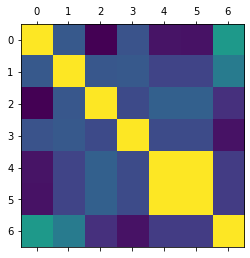

In [125]:
plt.matshow(asos_new.corr())

In [146]:
data=asos_new
data['Time'] = pd.to_datetime(data['일시'])
data = data.set_index('Time')
data = data.resample('h').first()
no,_=data.shape
print(data.shape)

(8761, 8)


In [145]:
data

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%)
Time,,,,,,,,
2019-01-01 00:00:00,2019-01-01 00:01,-2.4,0.0,270.0,0.8,1028.9,1031.2,19.4
2019-01-01 01:00:00,2019-01-01 01:00,-1.9,0.0,6.3,0.3,1028.8,1031.1,17.6
2019-01-01 02:00:00,2019-01-01 02:00,-2.2,0.0,352.8,1.7,1028.6,1030.9,16.6
2019-01-01 03:00:00,2019-01-01 03:00,-2.5,0.0,353.8,1.4,1028.7,1031.0,18.4
2019-01-01 04:00:00,2019-01-01 04:00,-3.9,0.0,307.1,1.4,1027.9,1030.3,20.3
...,...,...,...,...,...,...,...,...
2019-12-31 20:00:00,2019-12-31 20:00,-3.0,0.0,286.3,3.5,1025.6,1027.9,17.0
2019-12-31 21:00:00,2019-12-31 21:00,-2.6,0.0,280.7,4.4,1025.5,1027.8,14.0
2019-12-31 22:00:00,2019-12-31 22:00,-3.1,0.0,209.5,0.4,1025.8,1028.1,15.5


In [148]:
asos_in=data.drop('일시',axis=1)
asos_in

,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%)
Time,,,,,,,
2019-01-01 00:00:00,-2.4,0.0,270.0,0.8,1028.9,1031.2,19.4
2019-01-01 01:00:00,-1.9,0.0,6.3,0.3,1028.8,1031.1,17.6
2019-01-01 02:00:00,-2.2,0.0,352.8,1.7,1028.6,1030.9,16.6
2019-01-01 03:00:00,-2.5,0.0,353.8,1.4,1028.7,1031.0,18.4
2019-01-01 04:00:00,-3.9,0.0,307.1,1.4,1027.9,1030.3,20.3
...,...,...,...,...,...,...,...
2019-12-31 20:00:00,-3.0,0.0,286.3,3.5,1025.6,1027.9,17.0
2019-12-31 21:00:00,-2.6,0.0,280.7,4.4,1025.5,1027.8,14.0
2019-12-31 22:00:00,-3.1,0.0,209.5,0.4,1025.8,1028.1,15.5


In [149]:
scaler = MinMaxScaler()
scaled=scaler.fit(asos_in)
asos_scaled=scaler.transform(asos_in)
asos_scaled.shape

(8761, 7)

In [151]:
pd.DataFrame(asos_scaled).describe()

,0,1,2,3,4,5,6
count,8761.00000,8761.00000,8761.00000,8761.00000,8761.00000,8761.00000,8761.00000
mean,0.50060,0.00990,0.59611,0.17517,0.54933,0.54845,0.59445
std,0.20659,0.05172,0.27779,0.12484,0.17779,0.17831,0.25632
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.31818,0.00000,0.38288,0.08491,0.41855,0.41573,0.38568
50%,0.51591,0.00000,0.70770,0.15094,0.55430,0.55506,0.60897
75%,0.67273,0.00000,0.80161,0.23585,0.67647,0.67640,0.82051
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


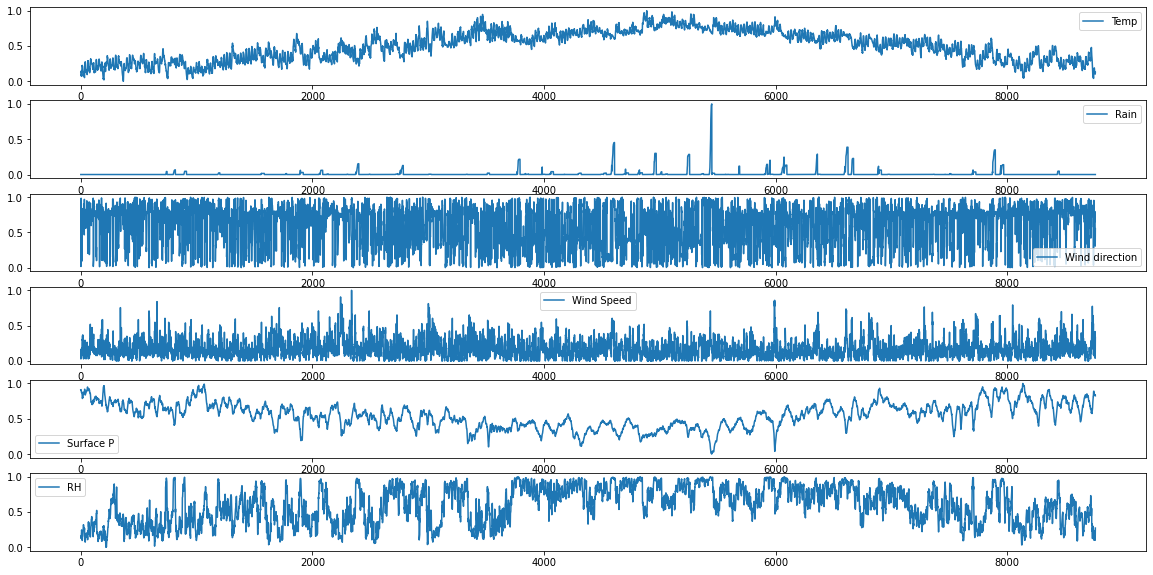

In [163]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(6,1)
ax=axs.flatten()

ax[0].plot(asos_scaled[:,0], label = 'Temp')
ax[0].legend()
ax[1].plot(asos_scaled[:,1], label = 'Rain')
ax[1].legend()
ax[2].plot(asos_scaled[:,2], label = 'Wind direction')
ax[2].legend()
ax[3].plot(asos_scaled[:,3], label = 'Wind Speed')
ax[3].legend()
ax[4].plot(asos_scaled[:,4], label = 'Surface P')
ax[4].legend()
ax[5].plot(asos_scaled[:,6], label = 'RH')
ax[5].legend()
plt.show()